In [9]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import random
import math

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

import plotly

In [10]:
#Cell_2.
csv_in="nikkei.csv"
df=pd.read_csv(csv_in,skiprows=0,header=0,delimiter='\s+')
print(df.shape) #確認
print(df.head()) #確認
print(type(df['日時'][0]))
df['日時']=pd.to_datetime(df['日時'])
print(type(df['日時'][0]))

(1401, 10)
           日時        始値        高値        安値        終値  単純移動平均1/単純移動平均  \
0  2019/01/17  20544.23  20571.75  20342.46  20402.27    1.148730e+09   
1  2019/01/18  20472.81  20682.12  20454.13  20666.07    1.150950e+09   
2  2019/01/21  20848.38  20892.68  20678.26  20719.33    1.127740e+09   
3  2019/01/22  20770.06  20805.93  20558.30  20622.91    1.010930e+09   
4  2019/01/23  20453.44  20686.29  20438.22  20593.72    2.060086e+04   

   単純移動平均2/単純移動平均  売買高/売買高+移動平均  単純移動平均1/売買高+移動平均  単純移動平均2/売買高+移動平均  
0             NaN           NaN               NaN               NaN  
1             NaN           NaN               NaN               NaN  
2             NaN           NaN               NaN               NaN  
3             NaN           NaN               NaN               NaN  
4    1.151880e+09  1.118046e+09               NaN               NaN  
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
#Cell_3.
df_d=df.copy()
df_d['日時']-=df_d['日時'][0]
print(type(df_d['日時'][0]))
df_d['日時']/=np.timedelta64(1,'D')
print(type(df_d['日時'][0]))
print(df_d.head())

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'numpy.float64'>
    日時        始値        高値        安値        終値  単純移動平均1/単純移動平均  \
0  0.0  20544.23  20571.75  20342.46  20402.27    1.148730e+09   
1  1.0  20472.81  20682.12  20454.13  20666.07    1.150950e+09   
2  4.0  20848.38  20892.68  20678.26  20719.33    1.127740e+09   
3  5.0  20770.06  20805.93  20558.30  20622.91    1.010930e+09   
4  6.0  20453.44  20686.29  20438.22  20593.72    2.060086e+04   

   単純移動平均2/単純移動平均  売買高/売買高+移動平均  単純移動平均1/売買高+移動平均  単純移動平均2/売買高+移動平均  
0             NaN           NaN               NaN               NaN  
1             NaN           NaN               NaN               NaN  
2             NaN           NaN               NaN               NaN  
3             NaN           NaN               NaN               NaN  
4    1.151880e+09  1.118046e+09               NaN               NaN  


In [12]:
#Cell_4.
print(type(df_d))
df_d=np.asarray(df_d)
print(type(df_d))
print(df_d.shape)
X=df_d[:,:1]
Y=df_d[:,4]
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(1401, 10)
(1401, 1)
(1401,)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     5449.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:44:22   Log-Likelihood:                -12931.
No. Observations:                1401   AIC:                         2.587e+04
Df Residuals:                    1399   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.947e+04    132.219    147.229      0.0

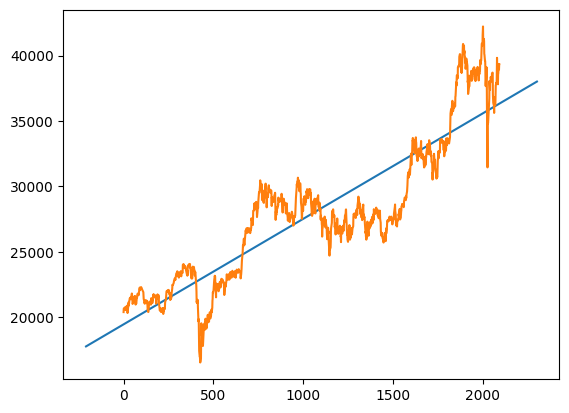

In [13]:
#Cell_5.
import statsmodels.api as sm

X=sm.add_constant(X)
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())
c=results.params[0]
a=results.params[1]

min_df=min(df_d[:,0])
max_df=max(df_d[:,0])
w_df=max_df-min_df
xx=np.linspace(min_df-0.1*w_df,max_df+0.1*w_df,20)
print(c,a)
#print(xx)
yy=c+a*xx
plt.plot(xx,yy)
plt.plot(df_d[:,0],Y)
plt.show()

In [14]:
#Cell_7.
obs=Y#df_d['終値']

In [15]:
#Cell_8.
len(obs)

1401

observation is: 20402.27
Predicted next value is: 19942.407865944093
observation is: 20666.07
Predicted next value is: 20674.126628497408
observation is: 20719.33
Predicted next value is: 21028.15232499542
observation is: 20622.91
Predicted next value is: 20840.55809718257
observation is: 20593.72
Predicted next value is: 20657.155902016584
observation is: 20574.63
Predicted next value is: 20560.43455895748
observation is: 20773.56
Predicted next value is: 20793.44464748871
observation is: 20649.0
Predicted next value is: 20682.063233176163
observation is: 20664.64
Predicted next value is: 20659.999127430583
observation is: 20556.54
Predicted next value is: 20522.050545004306
observation is: 20773.49
Predicted next value is: 20777.874872409786
observation is: 20788.39
Predicted next value is: 20853.460332483763
observation is: 20883.77
Predicted next value is: 20958.834341884867
observation is: 20844.45
Predicted next value is: 20897.96048921554
observation is: 20874.06
Predicted next 

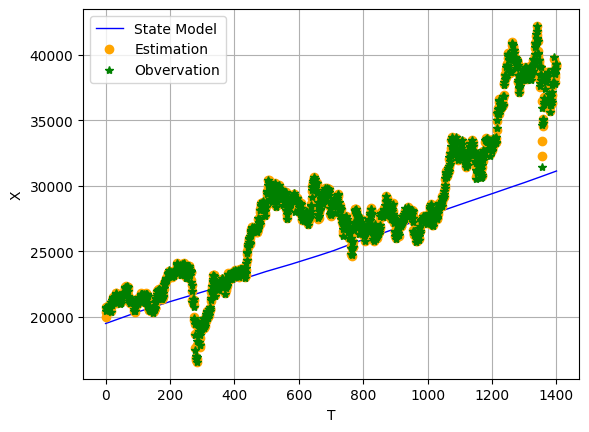

In [16]:
#Cell_9.
#https://wagtail.cds.tohoku.ac.jp/coda/python/stochastic-methods/kalman-filter-2.html

dt = 1
F = np.array([[1, dt],
              [0,1]])
G = np.array([[0],
              [math.sqrt(dt)]])
H = np.array([[1,0]])

x = np.zeros((2,1))
xt = np.zeros((2,1))#priorior estimator

#print(xt)

S = np.zeros((2,2))#priorior estimator

R = np.array([[0.01]])
Q = np.array([[0.01]])

x[0,0]=c
x[1,0]=a

#priorior estimators
xt[0,0]=c
xt[1,0]=a

#priorior estimators
S[0,0]=0.01
S[1,1]=0.01

T=[]
X=[]
XT=[]
ZT=[]

t=0
i=0
while i<len(obs):
    D = np.linalg.pinv(H.dot(S.dot(H.T)) + R)
    K = S.dot(H.T).dot(D) #Kalman gain.

    #Filtering step.
    zt = obs[int(i)]
    print('observation is:',zt)
    #posterior estimators.
    x2 = xt + K.dot(zt - H.dot(xt))
    S2 = (np.eye(2) - K.dot(H)).dot(S)

    T.append(t)
    X.append(x[0,0]) #'True' state
    XT.append(x2[0,0]) #estimated state (posterior)
    ZT.append(zt) #observation.

    #prediction step.
    #priorior estimators.
    xt = F.dot(x2)
    S = F.dot(S2.dot(F.T)) + G.dot(Q.dot(G.T))
    print('Predicted next value is:',xt[0,0])
    # update state. This cannot be observed.
    x = F.dot(x) + G.dot( np.random.multivariate_normal([0], R, 1).T )

    t = t + dt
    i+=1

plt.plot(T,X, color='blue', linewidth=1.0, label='State Model')
plt.plot(T,XT, 'o', color='orange', linewidth=1.0, label='Estimation')
plt.plot(T,ZT, '*',color='green',label='Obvervation')
plt.xlabel('T')
plt.ylabel('X')
plt.grid(True)
plt.legend()
plt.show()
